# Process of results

First some imports

In [18]:
import os
import os.path

from gravann.input import csv_reader
from gravann.functions import unit_conversion

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import ast
import warnings
warnings.filterwarnings('ignore')

Next, we read all finalized CSV files from the given `input_directory`:

In [29]:
input_directory = Path("./results/pretrain")
output_directory = Path("./results/pretrain")

# Error of interest
error_of_interest = "relRMSE"

pretrain_df = csv_reader.read_result_csv(
    input_directory,
    include=["results.csv"],
    exclude=["checkpoint", "validation"],
    files=[
        "./results/cg/total_results_cg.csv"
    ]
)
pretrain_df_copy = pretrain_df.copy()

Let's look at the initial result

In [30]:
pretrain_df["low_resolution"].fillna("False", inplace=True)

pretrain_df = pretrain_df.loc[(pretrain_df["noise"] == "['']") & (pretrain_df["ground_truth"] == "polyhedral") & (pretrain_df["sample_domain"] == "[0.0, 1.0]")]
pretrain_df

,sample,pretrained_model,output_folder,run_id,plotting_points,seed,ground_truth,low_resolution,loss,batch_size,...,relRMSE@Altitude_9,Normalized L1 Loss@High Altitude,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude,Unnamed: 0
0,churyumov-gerasimenko,NaN,results/pretrain-0,0,2500,3,polyhedral,True,normalized_L1_loss,1000,...,0.000046,0.019105,0.024832,0.241627,0.107192,0.036367,0.038903,0.257550,0.095072,NaN
1,churyumov-gerasimenko,NaN,results/pretrain-0,1,2500,7,polyhedral,True,normalized_L1_loss,1000,...,0.000032,0.019837,0.025435,0.259391,0.107969,0.044999,0.047700,0.331481,0.114994,NaN
2,churyumov-gerasimenko,NaN,results/pretrain-0,2,2500,9,polyhedral,True,normalized_L1_loss,1000,...,0.000024,0.020085,0.025819,0.272979,0.113908,0.037234,0.039643,0.245078,0.090434,NaN
3,churyumov-gerasimenko,NaN,results/pretrain-0,3,2500,37,polyhedral,True,normalized_L1_loss,1000,...,0.000065,0.022665,0.029435,0.315277,0.131559,0.036123,0.038609,0.234055,0.089627,NaN
4,churyumov-gerasimenko,NaN,results/pretrain-0,4,2500,42,polyhedral,True,normalized_L1_loss,1000,...,0.000041,0.020509,0.025964,0.208527,0.090902,0.040245,0.043019,0.213172,0.079334,NaN
5,churyumov-gerasimenko,NaN,results/pretrain-1,0,2500,67,polyhedral,True,normalized_L1_loss,1000,...,0.000049,0.022200,0.028403,0.302809,0.126995,0.039503,0.041986,0.247453,0.090122,NaN
6,churyumov-gerasimenko,NaN,results/pretrain-1,1,2500,99,polyhedral,True,normalized_L1_loss,1000,...,0.000069,0.027389,0.035677,0.371999,0.164312,0.059549,0.063410,0.454251,0.168325,NaN
7,churyumov-gerasimenko,NaN,results/pretrain-1,2,2500,433,polyhedral,True,normalized_L1_loss,1000,...,0.000043,0.023869,0.030975,0.350488,0.152245,0.039897,0.042459,0.294881,0.119218,NaN
8,churyumov-gerasimenko,NaN,results/pretrain-1,3,2500,1999,polyhedral,True,normalized_L1_loss,1000,...,0.000065,0.019471,0.025126,0.245737,0.108318,0.038053,0.040555,0.248516,0.091625,NaN
9,churyumov-gerasimenko,NaN,results/pretrain-1,4,2500,2023,polyhedral,True,normalized_L1_loss,1000,...,0.000032,0.020868,0.027051,0.298974,0.129134,0.039998,0.042571,0.305021,0.118300,NaN


# Processing and Data Visualization

First, we drop every uninteresting parameter and focus on the selected error. Further, we rember the used altitudes for validation.

In [31]:
interesting_columns = ["seed", "sample_domain", "sample", "low_resolution"]
interesting_columns.extend([col for col in pretrain_df if col.startswith(error_of_interest)])

pretrain_df = pretrain_df[interesting_columns]
pretrain_df = pretrain_df.drop(
    [f"{error_of_interest}@High Altitude", f"{error_of_interest}@Low Altitude"], axis=1
)
pretrain_df

,seed,sample_domain,sample,low_resolution,relRMSE@Altitude_0,relRMSE@Altitude_1,relRMSE@Altitude_2,relRMSE@Altitude_3,relRMSE@Altitude_4,relRMSE@Altitude_5,relRMSE@Altitude_6,relRMSE@Altitude_7,relRMSE@Altitude_8,relRMSE@Altitude_9
0,3,"[0.0, 1.0]",churyumov-gerasimenko,True,0.107869,0.053960,0.046373,0.013799,0.008969,0.003086,0.001750,0.000417,0.000221,0.000046
1,7,"[0.0, 1.0]",churyumov-gerasimenko,True,0.126482,0.068236,0.062645,0.016094,0.009979,0.002499,0.001615,0.000287,0.000151,0.000032
2,9,"[0.0, 1.0]",churyumov-gerasimenko,True,0.212800,0.106819,0.047222,0.014620,0.008513,0.002109,0.001044,0.000231,0.000117,0.000024
3,37,"[0.0, 1.0]",churyumov-gerasimenko,True,0.098154,0.065153,0.044265,0.013636,0.008535,0.003213,0.002118,0.000553,0.000304,0.000065
4,42,"[0.0, 1.0]",churyumov-gerasimenko,True,0.084546,0.074378,0.052032,0.018495,0.010507,0.006365,0.004670,0.000405,0.000198,0.000041
5,67,"[0.0, 1.0]",churyumov-gerasimenko,True,0.133138,0.073714,0.056398,0.016663,0.010520,0.003261,0.001809,0.000436,0.000235,0.000049
6,99,"[0.0, 1.0]",churyumov-gerasimenko,True,0.432523,0.087751,0.090717,0.018999,0.012096,0.004989,0.003224,0.000655,0.000334,0.000069
7,433,"[0.0, 1.0]",churyumov-gerasimenko,True,0.188952,0.076470,0.054470,0.012966,0.007901,0.002647,0.001535,0.000390,0.000203,0.000043
8,1999,"[0.0, 1.0]",churyumov-gerasimenko,True,1.396653,0.085620,0.048223,0.015071,0.009745,0.003797,0.002368,0.000584,0.000310,0.000065
9,2023,"[0.0, 1.0]",churyumov-gerasimenko,True,0.130998,0.073643,0.053406,0.013170,0.007441,0.002375,0.001349,0.000297,0.000157,0.000032


In [32]:
ALTITUDES = ast.literal_eval(pretrain_df_copy.at[0, "validation_sampling_altitudes"])
print(ALTITUDES)
print(unit_conversion.convert_altitude("churyumov-gerasimenko", np.array([1.0, 3.0, 5.0]), unit='km'))

[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]
[ 3.12660645  9.37981934 15.63303223]


Time to replace the altitudes and make them more readable:

In [33]:
unit_conversion.convert_pandas_altitudes(pretrain_df, ALTITUDES, convert_height=False, only_height=True)

,seed,sample_domain,sample,low_resolution,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0
0,3,"[0.0, 1.0]",churyumov-gerasimenko,True,0.107869,0.053960,0.046373,0.013799,0.008969,0.003086,0.001750,0.000417,0.000221,0.000046
1,7,"[0.0, 1.0]",churyumov-gerasimenko,True,0.126482,0.068236,0.062645,0.016094,0.009979,0.002499,0.001615,0.000287,0.000151,0.000032
2,9,"[0.0, 1.0]",churyumov-gerasimenko,True,0.212800,0.106819,0.047222,0.014620,0.008513,0.002109,0.001044,0.000231,0.000117,0.000024
3,37,"[0.0, 1.0]",churyumov-gerasimenko,True,0.098154,0.065153,0.044265,0.013636,0.008535,0.003213,0.002118,0.000553,0.000304,0.000065
4,42,"[0.0, 1.0]",churyumov-gerasimenko,True,0.084546,0.074378,0.052032,0.018495,0.010507,0.006365,0.004670,0.000405,0.000198,0.000041
5,67,"[0.0, 1.0]",churyumov-gerasimenko,True,0.133138,0.073714,0.056398,0.016663,0.010520,0.003261,0.001809,0.000436,0.000235,0.000049
6,99,"[0.0, 1.0]",churyumov-gerasimenko,True,0.432523,0.087751,0.090717,0.018999,0.012096,0.004989,0.003224,0.000655,0.000334,0.000069
7,433,"[0.0, 1.0]",churyumov-gerasimenko,True,0.188952,0.076470,0.054470,0.012966,0.007901,0.002647,0.001535,0.000390,0.000203,0.000043
8,1999,"[0.0, 1.0]",churyumov-gerasimenko,True,1.396653,0.085620,0.048223,0.015071,0.009745,0.003797,0.002368,0.000584,0.000310,0.000065
9,2023,"[0.0, 1.0]",churyumov-gerasimenko,True,0.130998,0.073643,0.053406,0.013170,0.007441,0.002375,0.001349,0.000297,0.000157,0.000032


In [9]:
unit_conversion.convert_altitude("churyumov-gerasimenko", np.array(ALTITUDES), unit='m')

array([3.12660645e+00, 1.56330322e+01, 3.12660645e+01, 1.56330322e+02,
       3.12660645e+02, 1.56330322e+03, 3.12660645e+03, 1.56330322e+04,
       3.12660645e+04, 1.56330322e+05])

In [34]:
pretrain_df = pretrain_df.drop(
    ["sample", "seed"], axis=1
)
pretrain_df.groupby(["low_resolution"]).mean()

,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0
low_resolution,,,,,,,,,,
True,0.291211,0.076574,0.055575,0.015351,0.009421,0.003434,0.002148,0.000426,0.000223,0.000047
False,0.279522,0.081753,0.057190,0.015144,0.009157,0.003237,0.002038,0.000411,0.000219,0.000046


Time for plotting. First make the DataFrame wide

In [57]:
str_altitudes = [str(x) for x in ALTITUDES]

dfm = pretrain_df.melt(["low_resolution"], str_altitudes, var_name="distance", value_name=error_of_interest)

dfm["distance"] = dfm["distance"].apply(lambda x: float(x))
dfm["low_resolution"].replace(True, "Low Resolution", inplace=True)
dfm["low_resolution"].replace("False", "High Resolution", inplace=True)
dfm[error_of_interest] = dfm[error_of_interest].apply(lambda x: float(x))
dfm

,low_resolution,distance,relRMSE
0,Low Resolution,0.001,0.107869
1,Low Resolution,0.001,0.126482
2,Low Resolution,0.001,0.212800
3,Low Resolution,0.001,0.098154
4,Low Resolution,0.001,0.084546
...,...,...,...
195,High Resolution,50.000,0.000049
196,High Resolution,50.000,0.000039
197,High Resolution,50.000,0.000041
198,High Resolution,50.000,0.000026


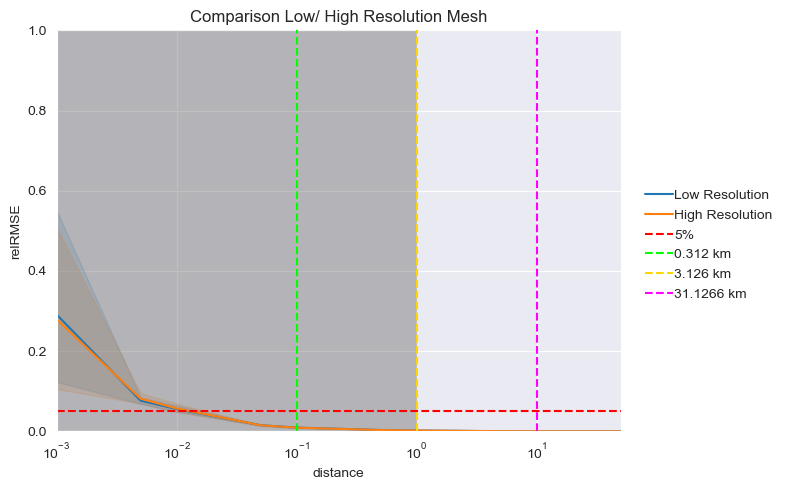

In [58]:
g = sns.relplot(
    data=dfm, kind="line",
    x="distance", y=error_of_interest,
    hue="low_resolution"
)
g.set(xlim=(0.001, 50.0), ylim=(0.0, 1.0), xscale='log', title="Comparison Low/ High Resolution Mesh")
g.map(plt.axhline, y=0.05, ls='--', c='red', label="5%")
g.map(plt.axvline, x=0.1, ls='--', c='lime', label="0.312 km")
g.map(plt.axvline, x=1.0, ls='--', c='gold', label="3.126 km")
g.map(plt.axvline, x=10.0, ls='--', c='fuchsia', label="31.1266 km")

for ax in g.axes[:,0]:
    ax.axvspan(0, 1.0, facecolor='gray', alpha=0.5)

g.legend.remove()
g.add_legend(handletextpad=0.1)
g.tight_layout()
save_path = os.path.join(output_directory, f"cg_pretrain_comparison_norm_{error_of_interest}_line.png")
g.savefig(save_path, dpi=300)